
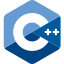
<br>

<div style="text-align:center; font-size:200%;">
 <b>Destruktoren und Vererbung</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 10 Destruktoren und Vererbung.ipynb -->
<!-- slides/module_170_oop/topic_130_destruction.cpp -->


- Der Destruktor wird wie andere Funktionen behandelt:
  - Wenn er nicht virtuell ist, bestimmt der statische Typ, welcher Destruktor
    aufgerufen wird.
  - Das ist fast immer falsch wenn Vererbung im Spiel ist!
  - Wenn die Unterklasse Ressourcen allokiert, werden diese nicht freigegeben.
- Wir müssen den Destruktor als virtuell deklarieren, damit er korrekt
  aufgerufen wird.

In [ ]:
#include <iostream>

In [ ]:
class BaseV1 {
public:
    ~BaseV1() {
        std::cout << "BaseV1::~BaseV1()\n";
    }
}

In [ ]:
class DerivedV1 : public BaseV1 {
public:
    ~DerivedV1() {
        std::cout << "DerivedV1::~DerivedV1()\n";
    }
}

In [ ]:
BaseV1* pb = new DerivedV1{};
delete pb;

In [ ]:
#include <memory>

In [ ]:
{
    std::unique_ptr<BaseV1> pb = std::make_unique<DerivedV1>();
}


- Der Destruktor von `DerivedV1` wird nicht aufgerufen!
- Wir müssen den Destruktor als virtuell deklarieren, damit er korrekt
  aufgerufen wird, wenn wir Klassen über Zeiger zerstören wollen.

In [ ]:
class Base {
public:
    virtual ~Base() {
        std::cout << "Base::~Base()\n";
    }
};

In [ ]:
class Derived : public Base {
public:
    ~Derived() {
        std::cout << "Derived::~Derived()\n";
    }
};

In [ ]:
Base* pb = new Derived{};
delete pb;

In [ ]:
#include <memory>

In [ ]:
{
    std::unique_ptr<Base> pb = std::make_unique<Derived>();
}


- Eine häufige Faustregel ist, dass ein Destruktor für eine Basisklasse
  entweder
  - public und virtuell oder
  - protected und nicht virtuell sein muss.
- Die zweite Form wird oft im [nicht-virtuellen
  Interface](https://en.wikibooks.org/wiki/More_C%2B%2B_Idioms/Non-Virtual_Interface)
  Pattern eingesetzt.


## Mini-Workshop: Destruktoren

Gegeben seien die im folgenden definierten Klassen `Shape`, `Circle` und
`Rectangle`.

- Schreiben Sie eine Funktion `total_area()`, die die Summe der Flächen aller
  Objekte für einen Vektor von `std::unique_ptr<Shape>` berechnet.
- Definieren Sie einen Vektor `shapes`, der Unique Pointer auf Shapes speichert.
- Speichern Sie in diesem Vektor folgende Objekte:
  - Ein `Circle` mit Radius 2.0
  - Ein `Rectangle` mit Breite 3.0 und Höhe 4.0
- Rufen Sie diese Funktion auf. Was passiert?
- Entfernen Sie alle Elemente aus `shapes`. Was passiert?
- Was müssen Sie tun, um den Fehler zu beheben?

In [ ]:
#include <iostream>

class Shape {
public:
    Shape() {
        std::cout << "Shape::Shape()\n";
    }
    virtual ~Shape() {
        std::cout << "Shape::~Shape()\n";
    }
    virtual double area() const = 0;
};

In [ ]:
constexpr double pi{3.14159265358979323846};
class Circle : public Shape {
public:
    Circle(double radius) : radius_{radius} {
        std::cout << "Circle::Circle()\n";
    }
    ~Circle() {
        std::cout << "Circle::~Circle()\n";
    }
    double area() const override {
        return radius_ * radius_ * pi;
    }
private:
    double radius_;
};

In [ ]:
class Rectangle : public Shape {
public:
    Rectangle(double width, double height) : width_{width}, height_{height} {
        std::cout << "Rectangle::Rectangle()\n";
    }
    ~Rectangle() {
        std::cout << "Rectangle::~Rectangle()\n";
    }
    double area() const override {
        return width_ * height_;
    }
private:
    double width_;
    double height_;
};

In [ ]:
#include <vector>

In [ ]:
double total_area(const std::vector<std::unique_ptr<Shape>>& shapes)
{
    double total{};
    for (const auto& shape : shapes) {
        total += shape->area();
    }
    return total;
}

In [ ]:
std::vector<std::unique_ptr<Shape>> shapes;

In [ ]:
shapes.push_back(std::make_unique<Circle>(2.0));

In [ ]:
shapes.push_back(std::make_unique<Rectangle>(3.0, 4.0));

In [ ]:
total_area(shapes);

In [ ]:
shapes.clear();